In [1]:
!pip install gensim


In [2]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [3]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [4]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

print(model.most_similar('pig'))

[('pigs', 0.7632631063461304), ('cow', 0.7517361044883728), ('sheep', 0.7164480090141296), ('hog', 0.7134536504745483), ('chickens', 0.6712349653244019), ('meat', 0.6696528792381287), ('cows', 0.6664847135543823), ('chicken', 0.6644933223724365), ('goat', 0.658318817615509), ('dog', 0.6554172039031982)]


In [5]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [6]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [7]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

gender=model["man"]-model["woman"]
print(model.most_similar(model["game"]+gender))
print(model.most_similar(model["book"]+gender))
print(model.most_similar(model["workout"]+gender))

[('game', 0.9239133596420288), ('games', 0.772285521030426), ('play', 0.7508355379104614), ('players', 0.7021974921226501), ('player', 0.6953575611114502), ('scoring', 0.6944923996925354), ('season', 0.6818820834159851), ('match', 0.6744409203529358), ('offense', 0.669812023639679), ('score', 0.6632142663002014)]
[('book', 0.8752008080482483), ('books', 0.7352908849716187), ('wrote', 0.7095823287963867), ('novel', 0.7051921486854553), ('published', 0.6938623189926147), ('story', 0.6895572543144226), ('biography', 0.6860859990119934), ('written', 0.6817030310630798), ('titled', 0.679893434047699), ('collection', 0.6619269251823425)]
[('workout', 0.8707600831985474), ('workouts', 0.7203687429428101), ('pregame', 0.5692938566207886), ('offseason', 0.5414839386940002), ('fitness', 0.5385448932647705), ('gym', 0.5216426849365234), ('shootaround', 0.513033390045166), ('regimen', 0.5045687556266785), ('game', 0.5043717622756958), ('setup', 0.49493175745010376)]


Part 2: Visualization and Embeddings in Space

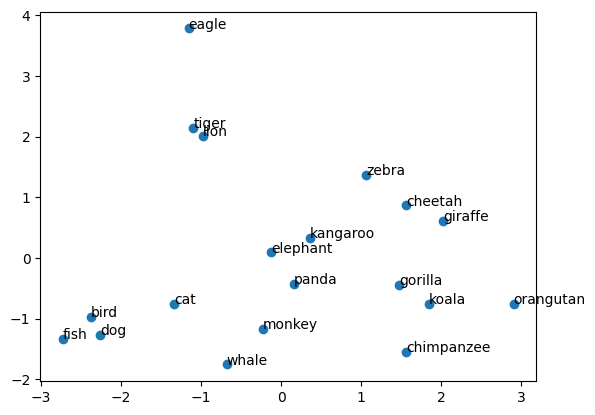

In [8]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

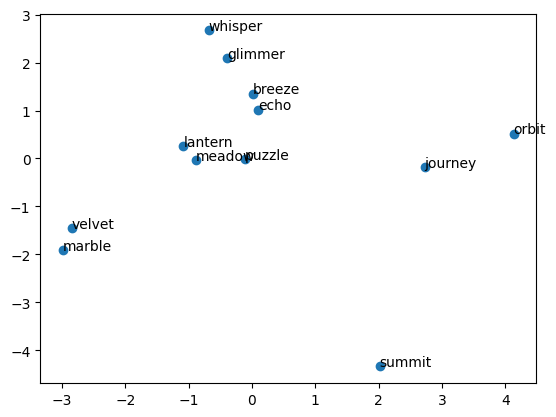

In [9]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

words = [
    "lantern", "breeze", "marble", "whisper",
"journey", "echo", "puzzle", "velvet",
"summit", "orbit", "meadow", "glimmer"

]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


In [10]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


Part 3: Embedding reddit posts

In [11]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [12]:
#using the code from project 1, clean the text and create a bag of words representation of the text
!pip3 install spacy

from sklearn.feature_extraction.text import CountVectorizer
import spacy
def clean(text):
  
    text = ' '.join(text.split())

    text = text.lower()
    
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text
data['cleaned_text'] = data['text'].apply(clean)
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])
bag_of_words

<9450x16344 sparse matrix of type '<class 'numpy.int64'>'
	with 226211 stored elements in Compressed Sparse Row format>

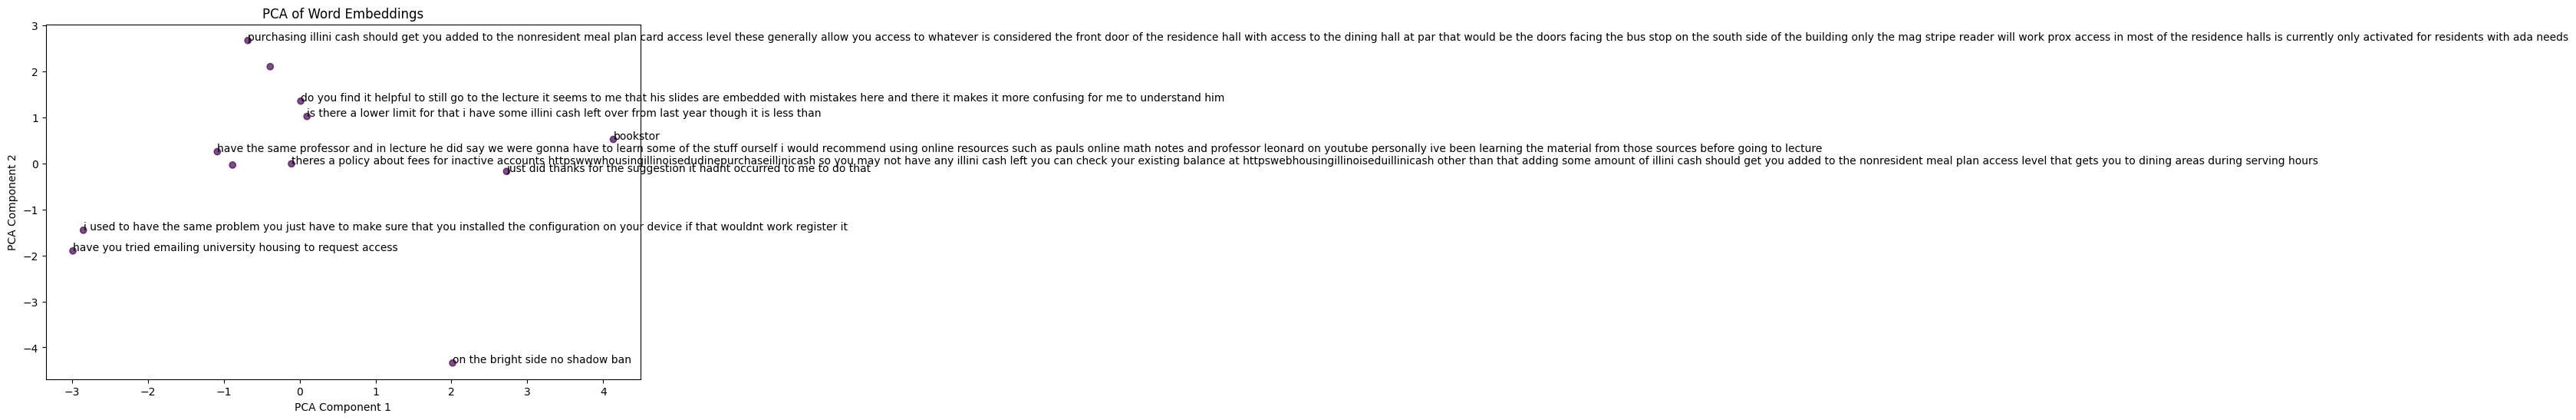

In [13]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

cleaned_texts = data['cleaned_text'].tolist()

X = [ ]
for text in cleaned_texts:
    embeddings = [model[word] for word in text.split() if word in model]
    if embeddings:
        X.append(np.mean(embeddings, axis=0))
    else:
        X.append(np.zeros(model.vector_size))

pca = PCA(n_components=2)
pca_x = pca.fit_transform(X)

plt.figure(figsize=(10, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c=data['label'].iloc[:len(X_pca)])

for i, word in enumerate(cleaned_texts[:10]):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Word Embeddings")
plt.show()

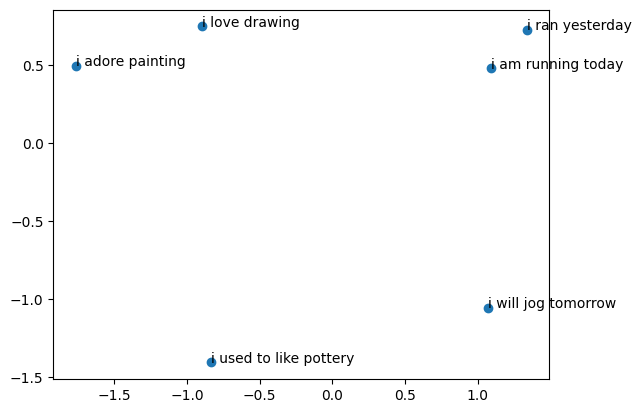

In [14]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

c:\Users\luffy\anaconda3\envs\is310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\luffy\anaconda3\envs\is310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


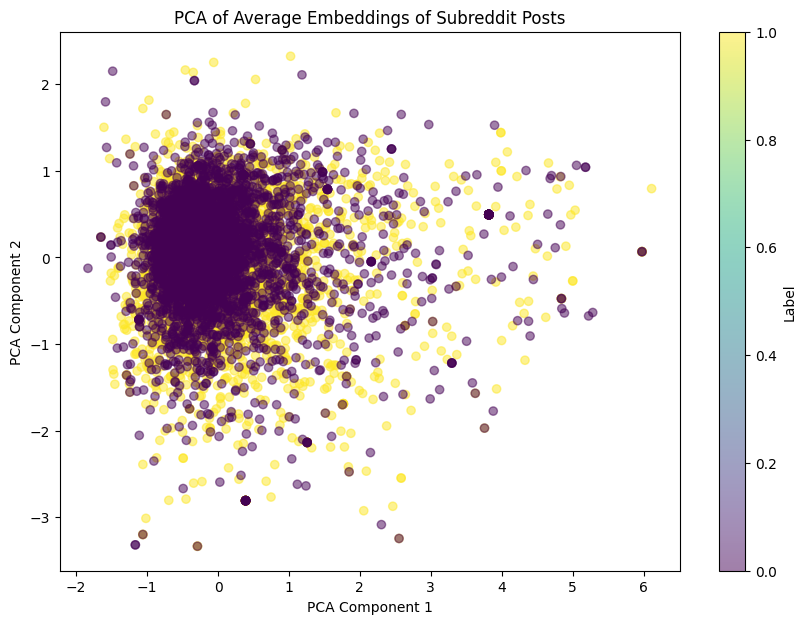

In [15]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

data['avg_embedding'] = data['cleaned_text'].apply(lambda x: avg_embedding(x, model))

data = data.dropna(subset=['avg_embedding'])

embeddings = np.array(data['avg_embedding'].tolist())
labels = data['label'].values

pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Average Embeddings of Subreddit Posts')
plt.show()

Part 4: HuggingFace and BERT

In [16]:
!pip install transformers

In [17]:
!pip install tensorflow

In [18]:
!pip install torch
!pip install tf-keras

In [19]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

c:\Users\luffy\anaconda3\envs\is310\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\luffy\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [24]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this movie! It's amazing!")

[{'label': 'POS', 'score': 0.9923858642578125}]

In [26]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
sample = data.head(1000)

sample['sentiment'] = sample['cleaned_text'].apply(lambda x: pipe(x[:128])[0]['label'])

most_common_sentiment = sample['sentiment'].value_counts().idxmax()
print(most_common_sentiment)

NEU


C:\Users\luffy\AppData\Local\Temp\ipykernel_17160\4045019607.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['sentiment'] = sample['cleaned_text'].apply(lambda x: pipe(x[:128])[0]['label'])


In [32]:
#look at ten sample posts and labels; do you agree with all of them? 
sample[['cleaned_text', 'sentiment', 'label']].sample(10)

,cleaned_text,sentiment,label
801,lettuce has no nutritional value lmao look it ...,NEG,1
636,question on top of question whats a good organ...,NEU,1
250,what it mean,NEU,1
995,buy a coat a nice heavy one that makes you loo...,NEU,1
955,welcome to scameren,POS,1
732,kindly send me a screenshot of my post if inte...,NEG,1
864,i agree but i would still say that sometimes h...,NEU,1
987,hello i esk a lot around campus and if you eve...,POS,1
501,hey id notify the illini bird strike team they...,NEU,1
829,thanks,NEU,1


In [40]:
#is the UIUC or Michigan subreddit more negative?
uiuc_negative = sample[(sample['label'] == 1) & (sample['sentiment'] == 'NEG')]
mich_negative = sample[(sample['label'] == 0) & (sample['sentiment'] == 'NEG')]

uiuc_negative_ratio = len(uiuc_negative) / len(data[data['label'] == 1])
mich_negative_ratio = len(mich_negative) / len(data[data['label'] == 0])

print(f"UIUC subreddit negative sentiment ratio: {uiuc_negative_ratio:.2f}")
print(f"Michigan subreddit negative sentiment ratio: {mich_negative_ratio:.2f}")

if uiuc_negative_ratio > mich_negative_ratio:
    print("The UIUC subreddit is more negative.")
elif mich_negative_ratio > uiuc_negative_ratio:
    print("The Michigan subreddit is more negative.")
else:
    print("Both subreddits have the same level of negativity.")

UIUC subreddit negative sentiment ratio: 0.04
Michigan subreddit negative sentiment ratio: 0.00
The UIUC subreddit is more negative.
